In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
ax = rc("font", family="serif", size=11)

In [2]:
N = 360
C = 5
alpha = 10
beta = 0.1

t = np.linspace(0, np.pi*C, N)
frequency = 20
omega = frequency/(2*np.pi)


def sine(t,alpha,freq):
    return alpha*np.cos(omega*t)
def expn(t,beta):
    return np.exp(-2 * beta * t)

decay = sine(t,alpha,omega) * expn(t,beta)

f_sg = 1
f_true = np.random.randn(N) * f_sg + decay
f_obs_sg = np.ones(N) * 2
f_obs = f_true + np.random.randn(N) * f_obs_sg

data = f_obs

y = sin(wt - phi)

Let's add some noise to the data.

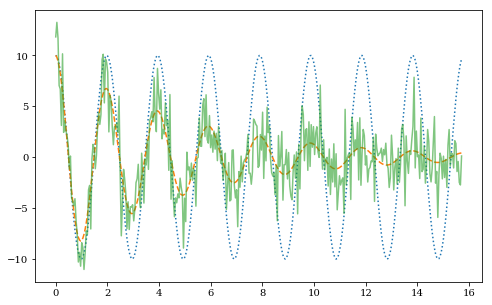

In [3]:
plt.figure(1, figsize=(8,5))
plt.plot(t, sine(t,alpha,omega), ':', t, decay, '--')
plt.plot(t, f_obs, alpha=0.6)
plt.show()

Equation given in Broomhall paper, referenced from Houdek 2008, for second frequency differences $\Delta_2$ is
\begin{equation*}
\Delta_2 \omega_{n,l} = A\omega_{n,l} e^{-2b^2\omega_{n,l}^2} \cos \left[2\left(\tau_{\textrm{He II}}\omega_{n,l}+d\right)\right]+K
\end{equation*}

We shall consider a simplified relation of the form

$$ \alpha\cos(\omega t) e^{-2\beta^2\omega^2} $$ 

In [4]:
code = '''
functions {
    real sine(real freq, real alpha, real t){
        return alpha * sin(freq*t);
    }
    real expn(real freq, real beta){
        return exp(-2 * beta * freq);
    }
}
data {
    int N;
    real t[N];
    real beta;
    real f_unc[N];
}
parameters {
    real<lower = 0> freq;
    real ln_height;

}
transformed parameters {
    real height;
    height = exp(ln_height);
}
model {

    real mod[N];
    for (i in 1:N){
        mod[i] = sine(freq, height, t[i]) * expn(t[i], beta);
    }
    mod ~ normal(freq,f_unc);
    freq ~ normal(20.0, 2.0);
    height ~ normal(10.0, 0.3);
    f_unc ~ lognormal(2.0, 1.0);
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4d2e753b8d26a14ffca419704e0ebd19 NOW.


In [6]:
stan_data = {'N': len(t),
             'f': t, 
             'freq': f_obs}
start = {'freq': 20.0}
nchains = 4
fit = sm.sampling(data=stan_data, iter=1000, chains=nchains, init=[start for n in range(nchains)])

RuntimeError: Exception: variable does not exist; processing stage=data initialization; variable name=t; base type=double  (in 'unknown file name' at line 12)


In [ ]:
print(fit)

In [ ]:
fit.plot()
plt.show()

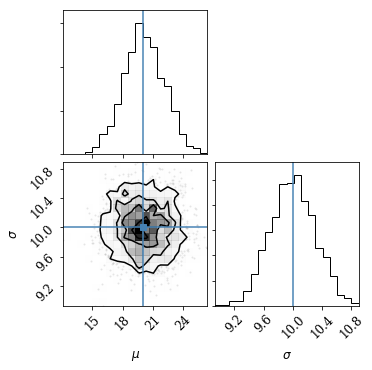

In [23]:
import corner
rc("font", family="serif", size=12)
data = np.vstack([fit['freq'], fit['ln_height']]).T
corner.corner(data, labels=[r'$\mu$', r'$\sigma$'], truths=[20, alpha])
plt.show()